In [1]:
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',', skip_header=1)
X = data[:,:1]
y = data[:,1]

X = np.c_[np.ones((X.shape[0], 1)), X]
print(X)
print(y)

[[1.   1.2 ]
 [1.   1.86]
 [1.   2.09]
 [1.   3.05]
 [1.   4.69]
 [1.   3.57]
 [1.   5.55]
 [1.   2.39]
 [1.   3.94]]
[2.43 2.91 3.41 4.71 5.94 5.4  7.04 3.38 5.29]


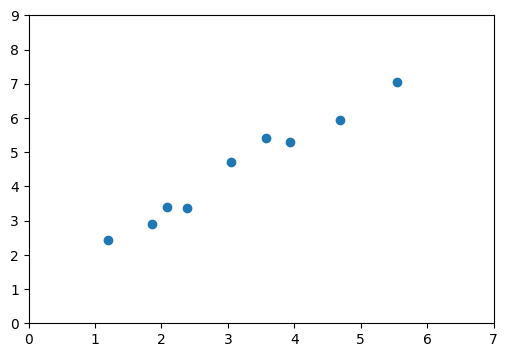

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)    
plt.show()

In [3]:
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

def compute_loss(individual):
    theta = np.array(individual)    
    y_hat = X.dot(theta)
    loss  = np.multiply((y_hat-y), (y_hat-y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 0.0001)
    return fitness

In [4]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [5]:
n = 2                  # size of individual (chromosome)
m = 100                # size of population
n_generations = 3000   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu

######################### algorithm  #########################
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    if i%100 == 0:
        losses.append(compute_loss(sorted_population[-1]))
        print("Best loss:", compute_loss(sorted_population[-1]), sorted_population[-1])      
    
    # create new_population
    new_population = sorted_population[-elitism:] 
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
            
    # update population
    population = new_population

Best loss: 114.06044329660527 [27.499498455478232, -5.223954995235602]
Best loss: 0.3375801030855688 [2.0538790248359806, 0.9345754397233064]
Best loss: 0.09417226749155828 [1.6057056946834125, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best loss: 0.09294109679052663 [1.590207448640335, 0.9345754397233064]
Best 

In [7]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])

[1.55450089148772, 0.9345754397233064]


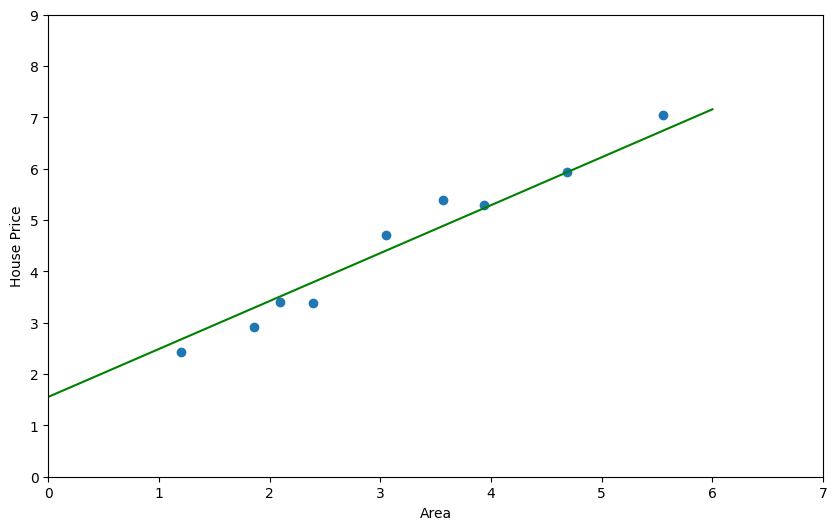

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)
plt.ylabel('House Price')
plt.xlabel('Area')

x_data = list(range(0, 7))
y_data = [0.934*x + 1.554 for x in x_data]
plt.plot(x_data, y_data,c='green')    
plt.show()

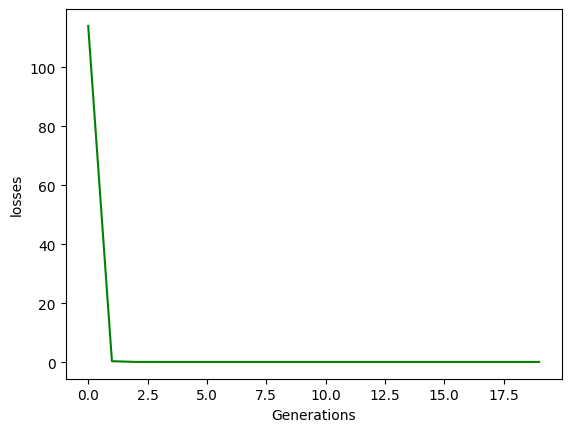

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses[:20], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()